In [2]:
import numpy as np
import scipy as sp
from scipy.sparse import diags
from scipy.sparse import csr_array
from scipy.sparse import linalg
import math
import timeit

import matplotlib.pyplot as plt

# Pre

In [4]:

class SimulationGrid:

    def __init__(self,L,N, k = 3, _type = 'Square', method = 'Fast', eigen = 'True'):
        """

        Creates a simulation grid.

        Inputs:

            - L: Square size, rectangle shape or circle diameter. Without considering boundaries
            - N: Discretization pints for Square side, Rectangle small side and Diameter of circle
            - k: Number of eigen values
        """
        self.L = L
        self.N = N
        self.dx = L/(N-1)
        self.k = k
        self.method = method
        self.eigen = eigen
        self.initialize(_type)
        self.data = [] #For simulations

    def initialize(self,  _type):
        """
        Initializes the v vector and M matrix in function of the type of grid
        """
        if _type == 'Square':
            self.times = timeit.default_timer()
            self.M = self.m_square()/(self.dx**2)
            self.times = timeit.default_timer() - self.times
        elif _type == 'Rectangle':
            self.times = timeit.default_timer()
            self.M = self.m_rectangle()/(self.dx**2)
            self.times = timeit.default_timer() - self.times
        elif _type == 'Circle':
            self.times = timeit.default_timer()
            self.M, self.M_g = self.m_circle()
            self.M = self.M/(self.dx**2)
            self.times = timeit.default_timer() - self.times
            self.M_2 = np.copy(self.M*(self.dx**2))
        else:
            print("That does not work")
        
        if self.eigen == 'True' and k != "Full":

            self.eigenvalues, self.eigenvectors = sp.sparse.linalg.eigs(self.M, k = self.k, sigma = 0.001)
            
        elif self.eigen == 'True' and k == "Full":
            self.eigenvalues, self.eigenvectors = sp.linalg.eigh(self.M)
        self.eigenvalues = np.abs(np.real(self.eigenvalues))
        self.eigenvectors = np.real(self.eigenvectors)

    
    def m_square(self):
        """
        Considers the grid as a square of size L
        """
        n = self.N*self.N 
        
        if self.method == 'Fast':
            x_diag = np.ones(n-1)
            x_diag[np.arange(1,n) % self.N == 0] = 0
            y_diag = np.ones(n - self.N)

            d = [y_diag, x_diag, np.full(n,-4), x_diag, y_diag]
            
            return diags(d , [-self.N,-1,0,1,self.N]).toarray()

        else:
            
            M = np.zeros((n, n))
            for i in range(n):
                M[i, i] = -4
                for j in range(n):
                    if j == i -self.N or j == i + self.N:
                        M[i,j] =  1
                    elif (j == i - 1) and ((j+1) % self.N != 0):
                        M[i,j] = 1
                    elif (j == i +1) and ((j)%self.N != 0):
                        M[i,j] = 1
            return M
        
    def m_rectangle(self):
        """
        Considers the grid as a rectangle of heigh of L and length 2*L
        Inputs:
            - m: Scale from L for Y axis
        """
        n = (self.N)*(self.N)*2
        
        if self.method == 'Fast':
            x_diag = np.ones(n-1)
            x_diag[np.arange(1,n) % self.N == 0] = 0

            y_diag = np.ones(n - self.N)

            d = [y_diag, x_diag, np.full(n,-4), x_diag, y_diag]
            return diags(d , [-self.N,-1,0,1,self.N]).toarray()
        
        else:
            M = np.zeros((n, n))
            for i in range(n):
                M[i, i] = -4
                for j in range(n):
                    if j == i -self.N or j == i + self.N:
                        M[i,j] =  1
                    elif (j == i - 1) and ((j+1) % self.N != 0):
                        M[i,j] = 1
                    elif (j == i +1) and ((j)%self.N != 0):
                        M[i,j] = 1
            
            return M
        
    def m_circle(self):
        """
        Considers the grid as a circle of diameter N. For this discretization, if N is par, then the center is ont, if impair it is 
        """
        n = (self.N)*(self.N)

        M = self.m_square()
        
        center_xy = self.L/2

        distances = np.sqrt(np.sum((np.indices((self.N,self.N))*self.dx - center_xy)**2, axis = 0))
        M_g = np.copy(distances)
        
        positions = np.where(distances.flatten() > self.L/2)[0]
        positions = positions[positions != int(np.floor(n/2))]
        
        
        M_g[M_g > L/2] = 0
        M_g[M_g != 0] = 1
        M_g[int(np.floor(self.N/2)),int(np.floor(self.N/2))] = 1
        
        M = np.delete(M, positions, axis = 0)
        M = np.delete(M, positions, axis = 1)

        return M,M_g

        
    def direct_method(self): 
        b = np.zeros(self.M_2.shape[0])

    def animation(self,save_animation = False):
        """

        Animates the stepping scheme:

        Inputs:

            -   method: If using time_dependent or time_independent

            -   save_animation: True == it will save the animation, default is False
        """

        fig, ax = plt.subplots()       

        C = np.copy(self.data)


        C = np.copy(self.A)
        

        ax.imshow(C, cmap='hot', interpolation='nearest', extent=[0, 1, 0, 1])

        ax.set_xlabel('X')  

        ax.set_ylabel('Y')  

        ax.set_title('Time: 0 s') 
        
        anim = animation.FuncAnimation(fig,self.frame, fargs= (ax,), frames=int(n_steps), interval = 0.000001)

        if save_animation == True:

            print("Starting ")

            anim.save('time_dependent_diffusion_animation.mp4', fps=60)
            plt.close()

    def frame(self, iteration, ax):

        C = self.data[iteration]

        ax.clear()

        ax.set_title(f'Time dependent(t={np.round(iteration*0.0001*50, 7)}) s')

        ax.imshow(C, cmap='hot', interpolation='nearest', extent=[0, 1, 0, 1])


# Part I

## A

Done

## B

sicpy linalg eig is for all matrices. scipy.inalg.eigh() is only specific for hermitian matrices and symatric matrices, thus if we want to compute all the eigenvalues and vector this is the best one and fastest, since it is specific for sparse matrices. Laslty, for computing only the smallest value sicpy.sparse.linalg.eigs() is used, since it is specific for sparse matrices and we can decide how many eigenvalues to compute, reducing the computational power

In [5]:
def v_conv(v,M):
    
    M_flat = M.flatten()
    v_flat = v.flatten()

    M_flat[M_flat == 1] = v_flat[:np.sum(M_flat == 1)]

    v_r = M_flat.reshape(M.shape)

    return v_r

In [11]:
N = 100
L = 1
k = 25

square = SimulationGrid(L,N,k, _type = 'Square')

rectangle = SimulationGrid(L,N,k, _type = 'Rectangle')

circle = SimulationGrid(L,N,k, _type = 'Circle')

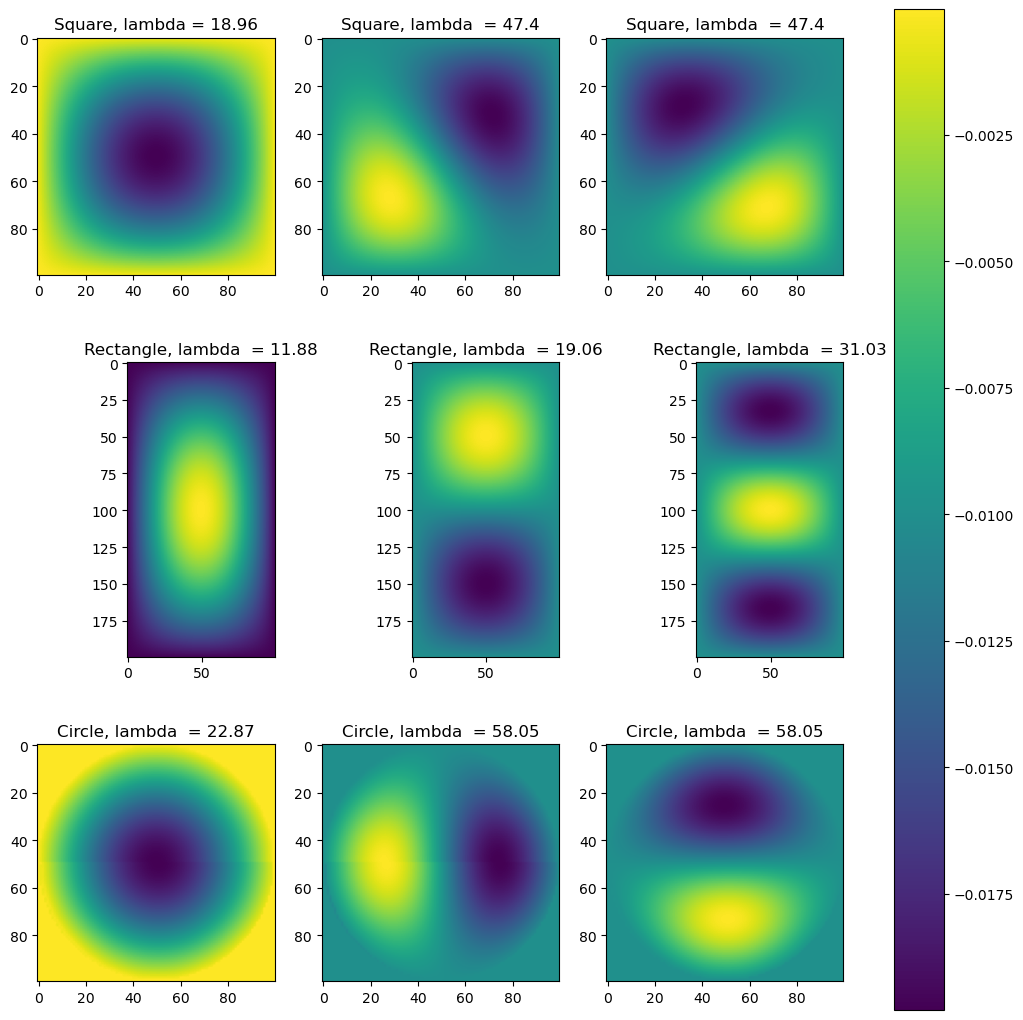

In [13]:
fig,axs = plt.subplots(3,3, figsize = (13,13))
axs = axs.flatten()
r = 1
m = 0
msq = 0
mrc = 0
mci = 0

axs[0].imshow(square.eigenvectors[:,msq].reshape(N,N))
axs[0].set_title(f'Square, lambda = {np.round(square.eigenvalues[m],2)}')

axs[1].imshow(square.eigenvectors[:,msq + r].reshape(N,N))
axs[1].set_title(f'Square, lambda  = {np.round(square.eigenvalues[m + r],2)}')

axs[2].imshow(square.eigenvectors[:,msq + 2*r].reshape(N,N))
axs[2].set_title(f'Square, lambda  = {np.round(square.eigenvalues[m + 2*r],2)}')


axs[3].imshow(rectangle.eigenvectors[:,mrc].reshape(2*N,N))
axs[3].set_title(f'Rectangle, lambda  = {np.round(rectangle.eigenvalues[m],2)}')

axs[4].imshow(rectangle.eigenvectors[:,mrc + r].reshape(2*N,N))
axs[4].set_title(f'Rectangle, lambda  = {np.round(rectangle.eigenvalues[m + r],2)}')

axs[5].imshow(rectangle.eigenvectors[:,mrc + 2*r].reshape(2*N,N))
axs[5].set_title(f'Rectangle, lambda  = {np.round(rectangle.eigenvalues[m + 2*r],2)}')



axs[6].imshow(v_conv(circle.eigenvectors[:,mci],circle.M_g))
axs[6].set_title(f'Circle, lambda  = {np.round(circle.eigenvalues[m],2)}')

axs[7].imshow(v_conv(circle.eigenvectors[:,mci + r],circle.M_g))
axs[7].set_title(f'Circle, lambda  = {np.round(circle.eigenvalues[m + r],2)}')

axs[8].imshow(v_conv(circle.eigenvectors[:,mci + 2*r],circle.M_g))
axs[8].set_title(f'Circle, lambda  = {np.round(circle.eigenvalues[m + 2*r],2)}')

fig.colorbar(axs[0].imshow(square.eigenvectors[:, msq].reshape(N, N)), ax=axs, orientation='vertical')


In [ ]:
mask = circle.M_g != 0
M = circle.M_g
fig, axs = plt.subplots(1,1, figsize = (17,17))

plt.imshow(mask, cmap='binary', interpolation='nearest')


for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        plt.text(j, i, M[i, j], ha='center', va='center', color='black')

plt.xticks(np.arange(M.shape[1]), ['c{}'.format(i+1) for i in range(M.shape[1])])
plt.yticks(np.arange(M.shape[0]), ['c{}'.format(i+1) for i in range(M.shape[0])])

plt.title('Heatmap of Matrix M with Grid Lines')
plt.colorbar(label='Presence of Value')



plt.show()

## C

In [176]:
L = 1
num = 20

Ns = np.linspace(10,50,num = num, dtype = int)
time_f = np.zeros((3,num))
time_l = np.zeros((3,num))

for i,N in enumerate(Ns):
    square = SimulationGrid(L,N, _type = 'Square',method = 'Slow', eigen= 'False')
    time_l[0,i] = square.times
 
    square = SimulationGrid(L,N, _type = 'Square', eigen= 'False')
    time_f[0,i] = square.times

    rectangle = SimulationGrid(L,N, _type = 'Rectangle',method = 'Slow', eigen= 'False')
    time_l[1,i] = rectangle.times

    rectangle = SimulationGrid(L,N, _type = 'Rectangle', eigen= 'False')
    time_f[1,i] = rectangle.times

    circle = SimulationGrid(L,N, _type = 'Circle',method = 'Slow', eigen= 'False')
    time_l[2,i] = circle.times

    circle = SimulationGrid(L,N, _type = 'Circle', eigen= 'False')
    time_f[2,i] = circle.times

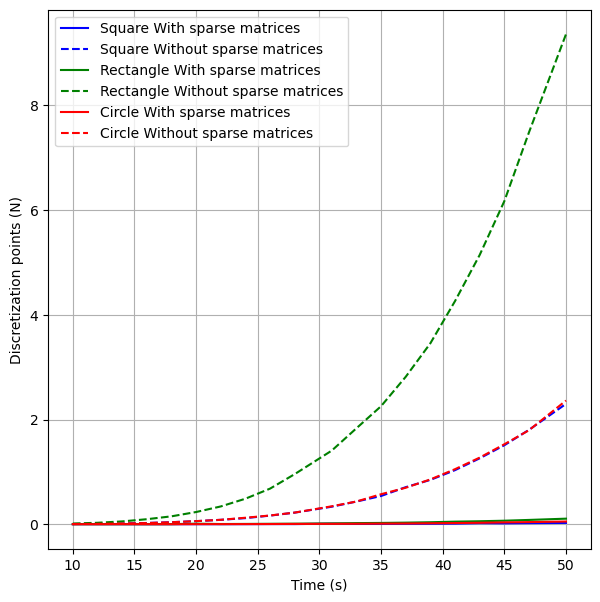

In [177]:
fig,axs = plt.subplots(1,1, figsize = (7,7))

names = ['Square', 'Rectangle', 'Circle']
colors = ['b','g','r']
for i in range(3):
    axs.plot(Ns,time_f[i],color = colors[i] , label = f'{names[i]} With sparse matrices')
    axs.plot(Ns,time_l[i], color = colors[i], linestyle = '--',label = f'{names[i]} Without sparse matrices')

axs.set_ylabel('Discretization points (N)')
axs.set_xlabel('Time (s)')
axs.grid(True)
axs.legend()

## D

In [14]:
T = 20
Ls = np.linspace(1,30, num = T)
Ns = np.linspace(5,600, num = T, dtype = int)

N = 50
L = 10
k = 5

L_change_sq = np.zeros((5,T))
L_change_rc = np.zeros((5,T))
L_change_ci = np.zeros((5,T))

N_change_rc = np.zeros((5,T))
N_change_sq = np.zeros((5,T))
N_change_ci = np.zeros((5,T))

for j,Li in enumerate(Ls):
    square = SimulationGrid(Li,N,k, _type = 'Square')
    rectangle = SimulationGrid(Li,N,k, _type = 'Rectangle')
    circle = SimulationGrid(Li,N,k, _type = 'Circle')
    for i in range(k):
        L_change_sq[i,j] = np.sqrt(square.eigenvalues[i])
        L_change_rc[i,j] = np.sqrt(rectangle.eigenvalues[i])
        L_change_ci[i,j] = np.sqrt(circle.eigenvalues[i])
    

for j,Ni in enumerate(Ns):
    square = SimulationGrid(L,Ni,k, _type = 'Square')
    rectangle = SimulationGrid(L,Ni,k, _type = 'Rectangle')
    circle = SimulationGrid(L,Ni,k, _type = 'Circle')
    for i in range(k):
        N_change_sq[i,j] = np.sqrt(square.eigenvalues[i])
        N_change_rc[i,j] = np.sqrt(rectangle.eigenvalues[i])
        N_change_ci[i,j] = np.sqrt(circle.eigenvalues[i])


MemoryError: Unable to allocate 20.0 GiB for an array with shape (51842, 51842) and data type float64

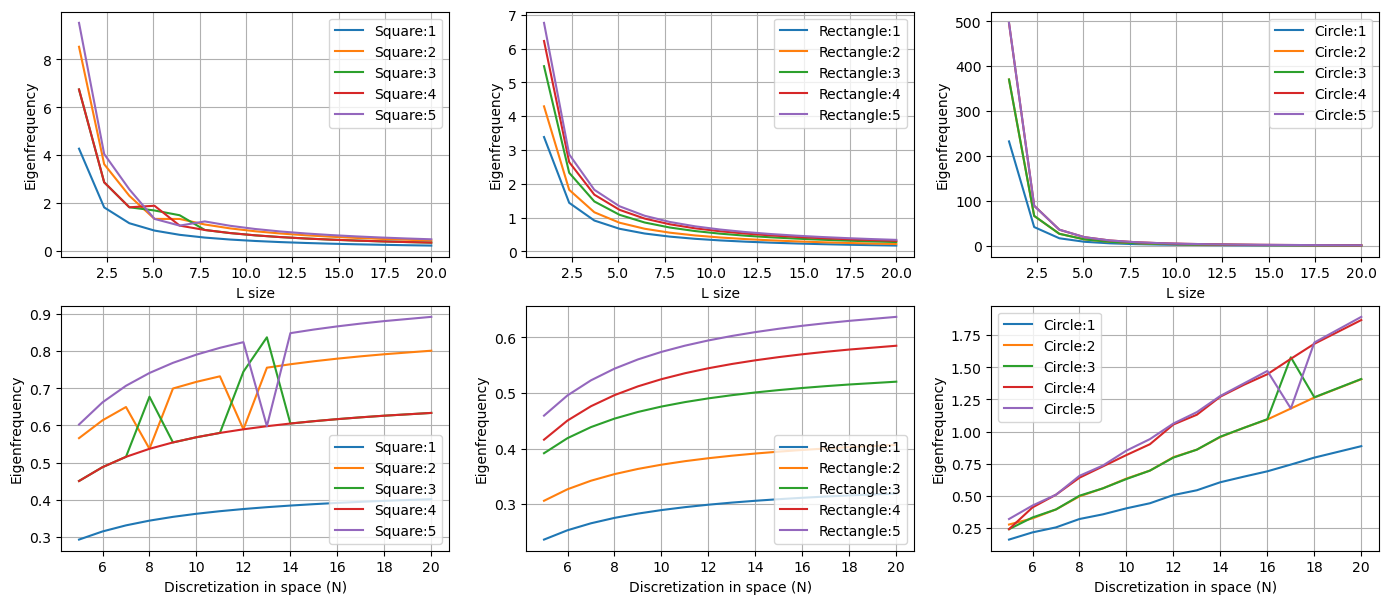

In [235]:
L_change = [L_change_sq, L_change_rc, L_change_ci]
N_change = [N_change_sq, N_change_rc, N_change_ci]

fig,axs = plt.subplots(2,3, figsize = (17,7))
names = ['Square', 'Rectangle', 'Circle']
eigens = ['1','2','3','4','5']
colors = ['b','g','r']
axs = axs.flatten()
for i in range(6):
    for j in range(k):
        if i < 3:
            axs[i].plot(Ls,L_change[i][j], label = f'{names[i]}:{eigens[j]}')
            axs[i].set_xlabel('L size')
            axs[i].set_ylabel('Eigenfrequency')
            axs[i].legend()
            axs[i].grid(True)
        else:
            axs[i].plot(Ns,N_change[i - 3][j], label = f'{names[i - 3]}:{eigens[j]}')
            axs[i].set_xlabel('Discretization in space (N)')
            axs[i].set_ylabel('Eigenfrequency')
    
            axs[i].legend()
            axs[i].grid(True)

 

## E

## Part II

In [ ]:
b = np.zeros(N)